In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

In [2]:
#AlphaVantage API Key: JTT7XFF68FXTHKRW

In [3]:
JD_API = 'JTT7XFF68FXTHKRW'

In [4]:
response = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPSTF&outputsize=full&apikey=JTT7XFF68FXTHKRW')
response.json()
#getting the JSON object

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'SPSTF',
  '3. Last Refreshed': '2021-06-04',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2021-06-04': {'1. open': '0.5350',
   '2. high': '0.5350',
   '3. low': '0.5350',
   '4. close': '0.5350',
   '5. volume': '0'},
  '2021-06-03': {'1. open': '0.5350',
   '2. high': '0.5350',
   '3. low': '0.5350',
   '4. close': '0.5350',
   '5. volume': '0'},
  '2021-06-02': {'1. open': '0.5350',
   '2. high': '0.5350',
   '3. low': '0.5350',
   '4. close': '0.5350',
   '5. volume': '0'},
  '2021-06-01': {'1. open': '0.5350',
   '2. high': '0.5350',
   '3. low': '0.5350',
   '4. close': '0.5350',
   '5. volume': '0'},
  '2021-05-28': {'1. open': '0.5350',
   '2. high': '0.5350',
   '3. low': '0.5350',
   '4. close': '0.5350',
   '5. volume': '0'},
  '2021-05-27': {'1. open': '0.5300',
   '2. high': '0.5300',
   '3. low': '0.5300',
   '4. close': '0.5

In [5]:
market_data_all = response.json()
#loading the API into a variable

len(market_data_all)
#checking the length of the dictionary

2

In [6]:
market_data_daily = market_data_all['Time Series (Daily)']
market_data_daily

#selecting the meat of the information we will use

{'2021-06-04': {'1. open': '0.5350',
  '2. high': '0.5350',
  '3. low': '0.5350',
  '4. close': '0.5350',
  '5. volume': '0'},
 '2021-06-03': {'1. open': '0.5350',
  '2. high': '0.5350',
  '3. low': '0.5350',
  '4. close': '0.5350',
  '5. volume': '0'},
 '2021-06-02': {'1. open': '0.5350',
  '2. high': '0.5350',
  '3. low': '0.5350',
  '4. close': '0.5350',
  '5. volume': '0'},
 '2021-06-01': {'1. open': '0.5350',
  '2. high': '0.5350',
  '3. low': '0.5350',
  '4. close': '0.5350',
  '5. volume': '0'},
 '2021-05-28': {'1. open': '0.5350',
  '2. high': '0.5350',
  '3. low': '0.5350',
  '4. close': '0.5350',
  '5. volume': '0'},
 '2021-05-27': {'1. open': '0.5300',
  '2. high': '0.5300',
  '3. low': '0.5300',
  '4. close': '0.5300',
  '5. volume': '0'},
 '2021-05-26': {'1. open': '0.5350',
  '2. high': '0.5350',
  '3. low': '0.5350',
  '4. close': '0.5350',
  '5. volume': '0'},
 '2021-05-25': {'1. open': '0.5400',
  '2. high': '0.5400',
  '3. low': '0.5400',
  '4. close': '0.5400',
  '5.

In [7]:
market_data_daily = pd.DataFrame(market_data_daily)
market_data_daily

#transforming dictionary into Pandas DataFrame

,2021-06-04,2021-06-03,2021-06-02,2021-06-01,2021-05-28,2021-05-27,2021-05-26,2021-05-25,2021-05-24,2021-05-21,...,2007-07-26,2007-07-25,2007-07-24,2007-07-23,2007-07-20,2007-07-19,2007-07-18,2007-07-17,2007-07-16,2007-07-13
1. open,0.5350,0.5350,0.5350,0.5350,0.5350,0.5300,0.5350,0.5400,0.5350,0.5350,...,0.7900,0.7900,0.7900,0.7900,0.7900,0.7900,0.8000,0.8000,0.8000,0.8000
2. high,0.5350,0.5350,0.5350,0.5350,0.5350,0.5300,0.5350,0.5400,0.5350,0.5350,...,0.7900,0.7900,0.7900,0.7900,0.7900,0.7900,0.8000,0.8000,0.8000,0.8000
3. low,0.5350,0.5350,0.5350,0.5350,0.5350,0.5300,0.5350,0.5400,0.5350,0.5350,...,0.7900,0.7900,0.7900,0.7900,0.7900,0.7900,0.8000,0.8000,0.8000,0.8000
4. close,0.5350,0.5350,0.5350,0.5350,0.5350,0.5300,0.5350,0.5400,0.5350,0.5350,...,0.7900,0.7900,0.7900,0.7900,0.7900,0.7900,0.8000,0.8000,0.8000,0.8000
5. volume,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,11000,0,0,0,5000


In [8]:
market_data_daily1 = market_data_daily.transpose()
market_data_daily1.index.dtype
#transposing DataFrame for ease of manipulation

dtype('O')

In [9]:
market_data_daily1[['1. open', '2. high', '3. low', '4. close', '5. volume']] = market_data_daily1[['1. open', '2. high', '3. low', '4. close', '5. volume']].astype('float')
market_data_daily1.info()

#converting the numerical columns into floats

<class 'pandas.core.frame.DataFrame'>
Index: 3476 entries, 2021-06-04 to 2007-07-13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    3476 non-null   float64
 1   2. high    3476 non-null   float64
 2   3. low     3476 non-null   float64
 3   4. close   3476 non-null   float64
 4   5. volume  3476 non-null   float64
dtypes: float64(5)
memory usage: 322.9+ KB


In [10]:
print(market_data_daily1.isnull().sum())

#checking for null entries in DataFrame

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64


In [11]:
market_data_daily1.index = pd.to_datetime(market_data_daily1.index)
market_data_daily1.index.dtype

#check that the index dtype is DateTime 

dtype('<M8[ns]')

In [12]:
market_data_daily2 = market_data_daily1.copy()

In [13]:
market_data_daily2 = market_data_daily2.drop('5. volume', axis = 1)
market_data_daily2

#dropping volume from DataFrame for plotting

,1. open,2. high,3. low,4. close
2021-06-04,0.535,0.535,0.535,0.535
2021-06-03,0.535,0.535,0.535,0.535
2021-06-02,0.535,0.535,0.535,0.535
2021-06-01,0.535,0.535,0.535,0.535
2021-05-28,0.535,0.535,0.535,0.535
...,...,...,...,...
2007-07-19,0.790,0.790,0.790,0.790
2007-07-18,0.800,0.800,0.800,0.800
2007-07-17,0.800,0.800,0.800,0.800
2007-07-16,0.800,0.800,0.800,0.800


Text(0.5, 1.0, 'Fig 1: Singpost Stock Price')

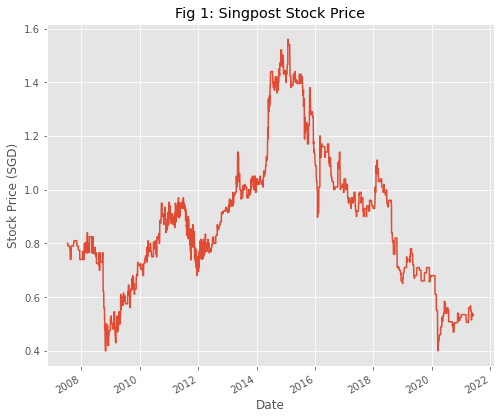

In [14]:
market_data_daily2['4. close'].plot()
plt.xlabel('Date')
plt.ylabel('Stock Price (SGD)')
plt.title('Fig 1: Singpost Stock Price')

In [15]:
market_data_daily1['day'] = market_data_daily1.index.weekday
market_data_daily1
#extracting the day of the week in numerical format

,1. open,2. high,3. low,4. close,5. volume,day
2021-06-04,0.535,0.535,0.535,0.535,0.0,4
2021-06-03,0.535,0.535,0.535,0.535,0.0,3
2021-06-02,0.535,0.535,0.535,0.535,0.0,2
2021-06-01,0.535,0.535,0.535,0.535,0.0,1
2021-05-28,0.535,0.535,0.535,0.535,0.0,4
...,...,...,...,...,...,...
2007-07-19,0.790,0.790,0.790,0.790,11000.0,3
2007-07-18,0.800,0.800,0.800,0.800,0.0,2
2007-07-17,0.800,0.800,0.800,0.800,0.0,1
2007-07-16,0.800,0.800,0.800,0.800,0.0,0


In [16]:
market_data_daily1['day_of_month'] = market_data_daily1.index.day
market_data_daily1
#extracting the date of the month

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month
2021-06-04,0.535,0.535,0.535,0.535,0.0,4,4
2021-06-03,0.535,0.535,0.535,0.535,0.0,3,3
2021-06-02,0.535,0.535,0.535,0.535,0.0,2,2
2021-06-01,0.535,0.535,0.535,0.535,0.0,1,1
2021-05-28,0.535,0.535,0.535,0.535,0.0,4,28
...,...,...,...,...,...,...,...
2007-07-19,0.790,0.790,0.790,0.790,11000.0,3,19
2007-07-18,0.800,0.800,0.800,0.800,0.0,2,18
2007-07-17,0.800,0.800,0.800,0.800,0.0,1,17
2007-07-16,0.800,0.800,0.800,0.800,0.0,0,16


In [17]:
market_data_daily1['month'] = market_data_daily1.index.month
market_data_daily1
#extracting the month

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month
2021-06-04,0.535,0.535,0.535,0.535,0.0,4,4,6
2021-06-03,0.535,0.535,0.535,0.535,0.0,3,3,6
2021-06-02,0.535,0.535,0.535,0.535,0.0,2,2,6
2021-06-01,0.535,0.535,0.535,0.535,0.0,1,1,6
2021-05-28,0.535,0.535,0.535,0.535,0.0,4,28,5
...,...,...,...,...,...,...,...,...
2007-07-19,0.790,0.790,0.790,0.790,11000.0,3,19,7
2007-07-18,0.800,0.800,0.800,0.800,0.0,2,18,7
2007-07-17,0.800,0.800,0.800,0.800,0.0,1,17,7
2007-07-16,0.800,0.800,0.800,0.800,0.0,0,16,7


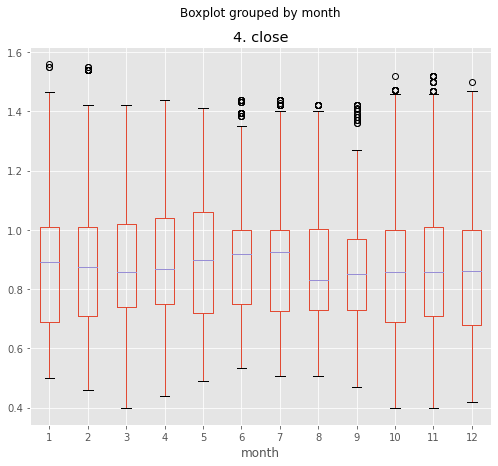

In [18]:
market_data_daily1.boxplot(column = '4. close', by = 'month')


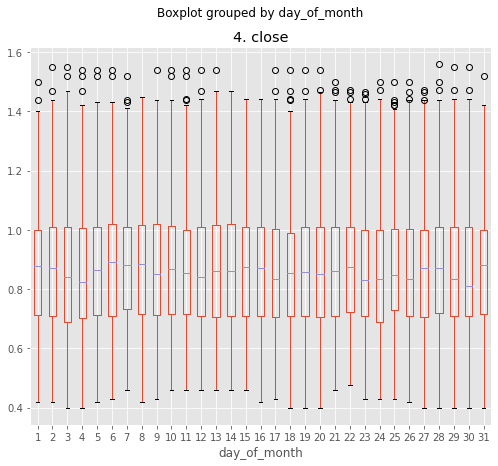

In [19]:
market_data_daily1.boxplot(column = '4. close', by = 'day_of_month')

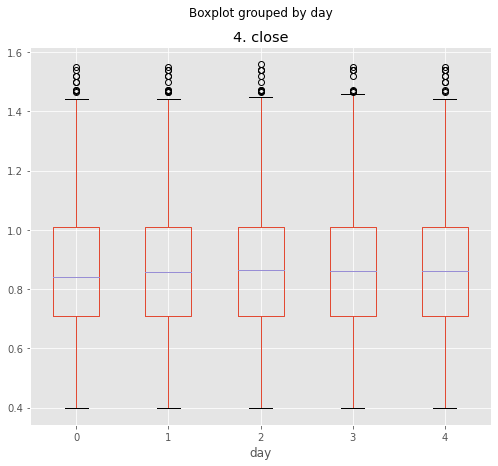

In [20]:
market_data_daily1.boxplot(column = '4. close', by = 'day')

In [21]:
market_data_daily3 = market_data_daily1.loc['2019-01-01':'2009-01-01']
market_data_daily3
#extracting data from 2009 to 2019

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month
2018-12-27,0.660,0.660,0.66,0.66,0.0,3,27,12
2018-12-26,0.660,0.660,0.66,0.66,0.0,2,26,12
2018-12-24,0.660,0.660,0.66,0.66,0.0,0,24,12
2018-12-21,0.660,0.660,0.66,0.66,0.0,4,21,12
2018-12-20,0.660,0.660,0.66,0.66,0.0,3,20,12
...,...,...,...,...,...,...,...,...
2009-01-08,0.530,0.530,0.53,0.53,12000.0,3,8,1
2009-01-07,0.525,0.525,0.52,0.52,0.0,2,7,1
2009-01-06,0.525,0.525,0.52,0.52,0.0,1,6,1
2009-01-05,0.525,0.525,0.52,0.52,0.0,0,5,1


In [22]:
market_data_daily3 = market_data_daily3.sort_index(ascending = True)
market_data_daily3
#sorting data in chronological order

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month
2009-01-02,0.525,0.525,0.52,0.52,0.0,4,2,1
2009-01-05,0.525,0.525,0.52,0.52,0.0,0,5,1
2009-01-06,0.525,0.525,0.52,0.52,0.0,1,6,1
2009-01-07,0.525,0.525,0.52,0.52,0.0,2,7,1
2009-01-08,0.530,0.530,0.53,0.53,12000.0,3,8,1
...,...,...,...,...,...,...,...,...
2018-12-20,0.660,0.660,0.66,0.66,0.0,3,20,12
2018-12-21,0.660,0.660,0.66,0.66,0.0,4,21,12
2018-12-24,0.660,0.660,0.66,0.66,0.0,0,24,12
2018-12-26,0.660,0.660,0.66,0.66,0.0,2,26,12


2009-01-02         NaN
2009-01-05    0.000000
2009-01-06    0.000000
2009-01-07    0.000000
2009-01-08    0.019231
                ...   
2018-12-20    0.000000
2018-12-21    0.000000
2018-12-24    0.000000
2018-12-26    0.000000
2018-12-27    0.000000
Name: 4. close, Length: 2510, dtype: float64


Text(0.5, 1.0, 'Fig 2: Singpost Daily Return')

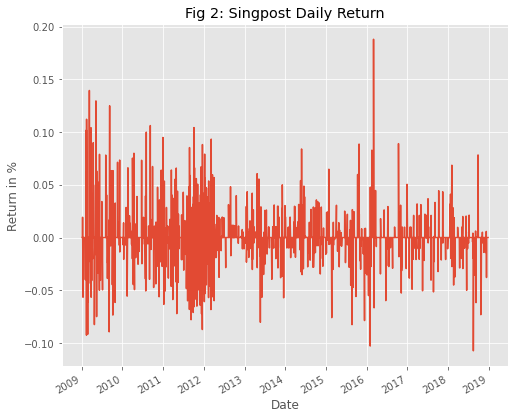

In [23]:
rets = (market_data_daily3['4. close']/market_data_daily3['4. close'].shift())-1
print(rets)
#obtain the daily return of stock

rets.plot(label = 'return')
plt.xlabel('Date')
plt.ylabel('Return in %')
plt.title('Fig 2: Singpost Daily Return')
#plotting the daily return

In [24]:
market_data_daily3['interday_close_percent'] = rets
market_data_daily3
#append daily return to DataFrame

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month,interday_close_percent
2009-01-02,0.525,0.525,0.52,0.52,0.0,4,2,1,NaN
2009-01-05,0.525,0.525,0.52,0.52,0.0,0,5,1,0.000000
2009-01-06,0.525,0.525,0.52,0.52,0.0,1,6,1,0.000000
2009-01-07,0.525,0.525,0.52,0.52,0.0,2,7,1,0.000000
2009-01-08,0.530,0.530,0.53,0.53,12000.0,3,8,1,0.019231
...,...,...,...,...,...,...,...,...,...
2018-12-20,0.660,0.660,0.66,0.66,0.0,3,20,12,0.000000
2018-12-21,0.660,0.660,0.66,0.66,0.0,4,21,12,0.000000
2018-12-24,0.660,0.660,0.66,0.66,0.0,0,24,12,0.000000
2018-12-26,0.660,0.660,0.66,0.66,0.0,2,26,12,0.000000


In [25]:
#simulating portfolio value for 100 shares held METHOD 1
market_data_daily4 = market_data_daily3.copy()
market_data_daily4['portfolio_hold'] = 100 * market_data_daily4['4. close']
market_data_daily4

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month,interday_close_percent,portfolio_hold
2009-01-02,0.525,0.525,0.52,0.52,0.0,4,2,1,NaN,52.0
2009-01-05,0.525,0.525,0.52,0.52,0.0,0,5,1,0.000000,52.0
2009-01-06,0.525,0.525,0.52,0.52,0.0,1,6,1,0.000000,52.0
2009-01-07,0.525,0.525,0.52,0.52,0.0,2,7,1,0.000000,52.0
2009-01-08,0.530,0.530,0.53,0.53,12000.0,3,8,1,0.019231,53.0
...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.660,0.660,0.66,0.66,0.0,3,20,12,0.000000,66.0
2018-12-21,0.660,0.660,0.66,0.66,0.0,4,21,12,0.000000,66.0
2018-12-24,0.660,0.660,0.66,0.66,0.0,0,24,12,0.000000,66.0
2018-12-26,0.660,0.660,0.66,0.66,0.0,2,26,12,0.000000,66.0


In [27]:
#simulating portfolio value for 100 shares held METHOD 2
market_data_daily5 = market_data_daily3.copy()

initial_value = market_data_daily5['4. close']['2009-01-02']*100
initial_value
#initialising portfolio value at start date

running_value = []
running_value.append(initial_value)
#create an empty list and append initial portfolio value

for k in market_data_daily5.loc['2009-01-05':,'interday_close_percent']:
    running_value.append((1+k)*running_value[-1])

#loop through daily stock %change in price and obtain end of day portfolio value

market_data_daily5['portfolio_hold'] = running_value
market_data_daily5
#append end of day portfolio value to dataset
    


,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month,interday_close_percent,portfolio_hold
2009-01-02,0.525,0.525,0.52,0.52,0.0,4,2,1,NaN,52.0
2009-01-05,0.525,0.525,0.52,0.52,0.0,0,5,1,0.000000,52.0
2009-01-06,0.525,0.525,0.52,0.52,0.0,1,6,1,0.000000,52.0
2009-01-07,0.525,0.525,0.52,0.52,0.0,2,7,1,0.000000,52.0
2009-01-08,0.530,0.530,0.53,0.53,12000.0,3,8,1,0.019231,53.0
...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.660,0.660,0.66,0.66,0.0,3,20,12,0.000000,66.0
2018-12-21,0.660,0.660,0.66,0.66,0.0,4,21,12,0.000000,66.0
2018-12-24,0.660,0.660,0.66,0.66,0.0,0,24,12,0.000000,66.0
2018-12-26,0.660,0.660,0.66,0.66,0.0,2,26,12,0.000000,66.0


In [28]:
(market_data_daily5['portfolio_hold'][-1] - market_data_daily5['portfolio_hold'][0])/market_data_daily5['portfolio_hold'][0]
#calculating % change in portfolio with buy-and-hold strategy

0.26923076923077444

In [29]:
mavg_50 = market_data_daily4['4. close'].rolling(window = 50).mean()
mavg_50
#calculating 50-day moving average

2009-01-02         NaN
2009-01-05         NaN
2009-01-06         NaN
2009-01-07         NaN
2009-01-08         NaN
                ...   
2018-12-20    0.734112
2018-12-21    0.730912
2018-12-24    0.727712
2018-12-26    0.724512
2018-12-27    0.721312
Name: 4. close, Length: 2510, dtype: float64

In [30]:
market_data_daily4['close_50'] = mavg_50
market_data_daily4
#append 50-day moving average

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month,interday_close_percent,portfolio_hold,close_50
2009-01-02,0.525,0.525,0.52,0.52,0.0,4,2,1,NaN,52.0,NaN
2009-01-05,0.525,0.525,0.52,0.52,0.0,0,5,1,0.000000,52.0,NaN
2009-01-06,0.525,0.525,0.52,0.52,0.0,1,6,1,0.000000,52.0,NaN
2009-01-07,0.525,0.525,0.52,0.52,0.0,2,7,1,0.000000,52.0,NaN
2009-01-08,0.530,0.530,0.53,0.53,12000.0,3,8,1,0.019231,53.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.660,0.660,0.66,0.66,0.0,3,20,12,0.000000,66.0,0.734112
2018-12-21,0.660,0.660,0.66,0.66,0.0,4,21,12,0.000000,66.0,0.730912
2018-12-24,0.660,0.660,0.66,0.66,0.0,0,24,12,0.000000,66.0,0.727712
2018-12-26,0.660,0.660,0.66,0.66,0.0,2,26,12,0.000000,66.0,0.724512


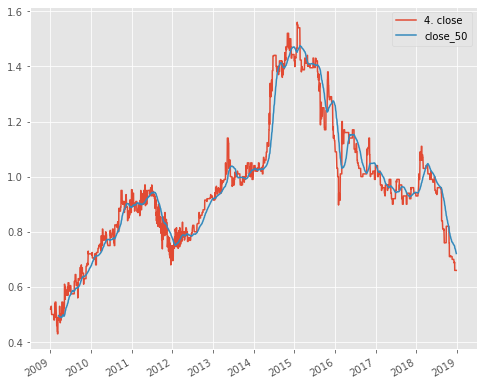

In [31]:
market_data_daily4[['4. close', 'close_50']].plot()

In [32]:
mavg_200 = market_data_daily4['4. close'].rolling(window = 200).mean()
mavg_200
#calculating 200-day moving average

2009-01-02         NaN
2009-01-05         NaN
2009-01-06         NaN
2009-01-07         NaN
2009-01-08         NaN
                ...   
2018-12-20    0.893979
2018-12-21    0.891929
2018-12-24    0.890079
2018-12-26    0.888229
2018-12-27    0.886379
Name: 4. close, Length: 2510, dtype: float64

In [33]:
market_data_daily4['close_200'] = mavg_200
market_data_daily4
#append the 200-day moving average

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month,interday_close_percent,portfolio_hold,close_50,close_200
2009-01-02,0.525,0.525,0.52,0.52,0.0,4,2,1,NaN,52.0,NaN,NaN
2009-01-05,0.525,0.525,0.52,0.52,0.0,0,5,1,0.000000,52.0,NaN,NaN
2009-01-06,0.525,0.525,0.52,0.52,0.0,1,6,1,0.000000,52.0,NaN,NaN
2009-01-07,0.525,0.525,0.52,0.52,0.0,2,7,1,0.000000,52.0,NaN,NaN
2009-01-08,0.530,0.530,0.53,0.53,12000.0,3,8,1,0.019231,53.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.660,0.660,0.66,0.66,0.0,3,20,12,0.000000,66.0,0.734112,0.893979
2018-12-21,0.660,0.660,0.66,0.66,0.0,4,21,12,0.000000,66.0,0.730912,0.891929
2018-12-24,0.660,0.660,0.66,0.66,0.0,0,24,12,0.000000,66.0,0.727712,0.890079
2018-12-26,0.660,0.660,0.66,0.66,0.0,2,26,12,0.000000,66.0,0.724512,0.888229


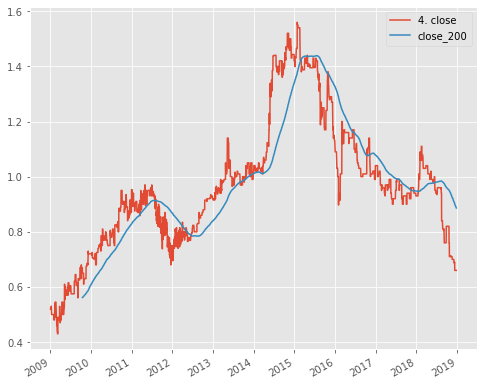

In [34]:
market_data_daily4[['4. close', 'close_200']].plot()

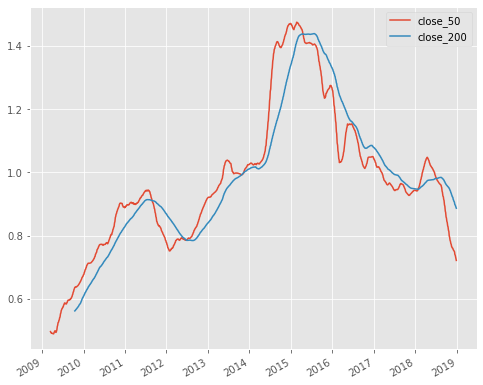

In [35]:
market_data_daily4[['close_50', 'close_200']].plot()

In [36]:
market_data_daily4_dropna = market_data_daily4[market_data_daily4['close_200'].notna()]
market_data_daily4_dropna
#dropping the first 200 days without 200-day moving average

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month,interday_close_percent,portfolio_hold,close_50,close_200
2009-10-16,0.65,0.65,0.65,0.65,20000.0,4,16,10,-0.029851,65.0,0.635800,0.561600
2009-10-19,0.65,0.65,0.65,0.65,0.0,0,19,10,0.000000,65.0,0.636400,0.562250
2009-10-20,0.65,0.65,0.65,0.65,0.0,1,20,10,0.000000,65.0,0.637000,0.562900
2009-10-21,0.65,0.65,0.65,0.65,0.0,2,21,10,0.000000,65.0,0.637600,0.563550
2009-10-22,0.65,0.65,0.65,0.65,16000.0,3,22,10,0.000000,65.0,0.637700,0.564200
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.66,0.66,0.66,0.66,0.0,3,20,12,0.000000,66.0,0.734112,0.893979
2018-12-21,0.66,0.66,0.66,0.66,0.0,4,21,12,0.000000,66.0,0.730912,0.891929
2018-12-24,0.66,0.66,0.66,0.66,0.0,0,24,12,0.000000,66.0,0.727712,0.890079
2018-12-26,0.66,0.66,0.66,0.66,0.0,2,26,12,0.000000,66.0,0.724512,0.888229


In [37]:
#applying a trading strategy where if mavg_50 > m_avg200, buy shares if there is cash. If no cash, do nothing. 
#if mavg_50 < mavg_200, sell shares if there are shares. If no shares, do nothing.

num_shares = 100
#number of shares at the beginning

cash = 0
#number of cash at the beginning

portfolio_sma = []
cash_sma = []

for i, row in market_data_daily4_dropna.iterrows():
    if row['close_50'] > row['close_200']:
        if num_shares > 0:
            portfolio_sma.append(num_shares * row['4. close'])
            cash_sma.append(cash)
            # if the mavg_50 > mavg_200 and shares > 0, then do nothing. 
        else:
            num_shares = cash/ row['4. close']
            cash = 0
            portfolio_sma.append(num_shares * row['4. close'])
            cash_sma.append(cash)
            # if the mavg_50 > mavg_200 and shares = 0 , then buy shares.
    else:
        if num_shares > 0:
            cash = num_shares * row['4. close']
            num_shares = 0
            portfolio_sma.append(num_shares * row['4. close'])
            cash_sma.append(cash)
            # if the mavg_50 < mavg_200 and shares > 0, then sell all shares. 
        else:
            portfolio_sma.append(num_shares * row['4. close'])
            cash_sma.append(cash)
            # if the mavg_50 < mavg_200 and shares =  0, then do nothing. 

print(cash_sma)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [62]:
market_data_daily4_dropna['portfolio_sma'] = portfolio_sma
market_data_daily4_dropna['cash_sma'] = cash_sma
market_data_daily4_dropna
#append results into DataFrame

<ipython-input-62-86a70e039602>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data_daily4_dropna['portfolio_sma'] = portfolio_sma
<ipython-input-62-86a70e039602>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data_daily4_dropna['cash_sma'] = cash_sma


,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month,interday_close_percent,portfolio_hold,close_50,close_200,portfolio_sma,cash_sma
2009-10-16,0.65,0.65,0.65,0.65,20000.0,4,16,10,-0.029851,65.0,0.635800,0.561600,65.0,0.000000
2009-10-19,0.65,0.65,0.65,0.65,0.0,0,19,10,0.000000,65.0,0.636400,0.562250,65.0,0.000000
2009-10-20,0.65,0.65,0.65,0.65,0.0,1,20,10,0.000000,65.0,0.637000,0.562900,65.0,0.000000
2009-10-21,0.65,0.65,0.65,0.65,0.0,2,21,10,0.000000,65.0,0.637600,0.563550,65.0,0.000000
2009-10-22,0.65,0.65,0.65,0.65,16000.0,3,22,10,0.000000,65.0,0.637700,0.564200,65.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.66,0.66,0.66,0.66,0.0,3,20,12,0.000000,66.0,0.734112,0.893979,0.0,133.515472
2018-12-21,0.66,0.66,0.66,0.66,0.0,4,21,12,0.000000,66.0,0.730912,0.891929,0.0,133.515472
2018-12-24,0.66,0.66,0.66,0.66,0.0,0,24,12,0.000000,66.0,0.727712,0.890079,0.0,133.515472
2018-12-26,0.66,0.66,0.66,0.66,0.0,2,26,12,0.000000,66.0,0.724512,0.888229,0.0,133.515472


In [39]:
market_data_daily_dummy = market_data_daily1.loc['2019-01-01':'2009-01-01',:].sort_index()
market_data_daily_dummy
#create a dataset for dummifying data

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month
2009-01-02,0.525,0.525,0.52,0.52,0.0,4,2,1
2009-01-05,0.525,0.525,0.52,0.52,0.0,0,5,1
2009-01-06,0.525,0.525,0.52,0.52,0.0,1,6,1
2009-01-07,0.525,0.525,0.52,0.52,0.0,2,7,1
2009-01-08,0.530,0.530,0.53,0.53,12000.0,3,8,1
...,...,...,...,...,...,...,...,...
2018-12-20,0.660,0.660,0.66,0.66,0.0,3,20,12
2018-12-21,0.660,0.660,0.66,0.66,0.0,4,21,12
2018-12-24,0.660,0.660,0.66,0.66,0.0,0,24,12
2018-12-26,0.660,0.660,0.66,0.66,0.0,2,26,12


In [40]:
day_dummy = pd.get_dummies(market_data_daily_dummy['day'],prefix = 'day_', drop_first = True)
day_dummy
#dummify day of the week

,day__1,day__2,day__3,day__4
2009-01-02,0,0,0,1
2009-01-05,0,0,0,0
2009-01-06,1,0,0,0
2009-01-07,0,1,0,0
2009-01-08,0,0,1,0
...,...,...,...,...
2018-12-20,0,0,1,0
2018-12-21,0,0,0,1
2018-12-24,0,0,0,0
2018-12-26,0,1,0,0


In [41]:
day_of_month_dummy = pd.get_dummies(market_data_daily_dummy['day_of_month'], prefix = 'day_of_month', drop_first = True)
day_of_month_dummy
#dummify day of the month

,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,day_of_month_10,day_of_month_11,...,day_of_month_22,day_of_month_23,day_of_month_24,day_of_month_25,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31
2009-01-02,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-05,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-06,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-07,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-08,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-12-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-12-24,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2018-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
month_dummy = pd.get_dummies(market_data_daily_dummy['month'], prefix = 'month', drop_first = True)
month_dummy
#dummify month

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2009-01-02,0,0,0,0,0,0,0,0,0,0,0
2009-01-05,0,0,0,0,0,0,0,0,0,0,0
2009-01-06,0,0,0,0,0,0,0,0,0,0,0
2009-01-07,0,0,0,0,0,0,0,0,0,0,0
2009-01-08,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0,0,0,0,0,0,0,0,0,0,1
2018-12-21,0,0,0,0,0,0,0,0,0,0,1
2018-12-24,0,0,0,0,0,0,0,0,0,0,1
2018-12-26,0,0,0,0,0,0,0,0,0,0,1


In [43]:
market_data_daily_dummy = pd.concat([market_data_daily_dummy[['1. open','4. close']],day_dummy,day_of_month_dummy,month_dummy], axis = 1)
market_data_daily_dummy
#create the final dummy dataset

,1. open,4. close,day__1,day__2,day__3,day__4,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2009-01-02,0.525,0.52,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-05,0.525,0.52,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2009-01-06,0.525,0.52,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-07,0.525,0.52,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-08,0.530,0.53,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.660,0.66,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-21,0.660,0.66,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-24,0.660,0.66,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-26,0.660,0.66,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
independent_variable = market_data_daily_dummy.drop('4. close', axis = 1)
independent_variable
#seperate the independent variables

,1. open,day__1,day__2,day__3,day__4,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,day_of_month_6,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2009-01-02,0.525,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-05,0.525,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-06,0.525,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2009-01-07,0.525,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-08,0.530,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.660,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-21,0.660,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-24,0.660,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-26,0.660,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
dependent_variable = market_data_daily_dummy['4. close']
dependent_variable
#seperate the dependent variable

2009-01-02    0.52
2009-01-05    0.52
2009-01-06    0.52
2009-01-07    0.52
2009-01-08    0.53
              ... 
2018-12-20    0.66
2018-12-21    0.66
2018-12-24    0.66
2018-12-26    0.66
2018-12-27    0.66
Name: 4. close, Length: 2510, dtype: float64

In [46]:
linreg = LinearRegression()
#instantiate a Linear Regression model

In [47]:
tree = DecisionTreeRegressor()
#instantiate a Decision Tree model

In [48]:
forest = RandomForestRegressor()
#instantiate a Random Forest model

In [63]:
X_train = independent_variable.iloc[:int(0.8*len(independent_variable.index)),:]
X_train
#slicing the first 80% of time series. As the dataset is a continuous time series, we will use the first 80% of days as the train dataset, and the remaining 20% as the test dataset

,1. open,day__1,day__2,day__3,day__4,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,day_of_month_6,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2009-01-02,0.525,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-05,0.525,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-06,0.525,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2009-01-07,0.525,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-08,0.530,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-15,1.020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-12-16,1.020,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-12-19,1.020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-12-20,1.020,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
X_test = independent_variable.iloc[int(0.8*len(independent_variable.index)):,:]
X_test
#slicing the last 20% of time series

,1. open,day__1,day__2,day__3,day__4,day_of_month_2,day_of_month_3,day_of_month_4,day_of_month_5,day_of_month_6,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2016-12-22,0.9900,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-12-23,0.9900,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-12-27,0.9900,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-12-28,0.9900,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-12-29,0.9925,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.6600,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-21,0.6600,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-24,0.6600,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-26,0.6600,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
y_train = dependent_variable.iloc[:int(0.8*len(dependent_variable.index))]
y_train

2009-01-02    0.52
2009-01-05    0.52
2009-01-06    0.52
2009-01-07    0.52
2009-01-08    0.53
              ... 
2016-12-15    1.02
2016-12-16    1.02
2016-12-19    1.02
2016-12-20    1.02
2016-12-21    1.02
Name: 4. close, Length: 2008, dtype: float64

In [54]:
y_test = dependent_variable.iloc[int(0.8*len(dependent_variable.index)):]
y_test

2016-12-22    0.99
2016-12-23    0.99
2016-12-27    0.99
2016-12-28    0.99
2016-12-29    0.99
              ... 
2018-12-20    0.66
2018-12-21    0.66
2018-12-24    0.66
2018-12-26    0.66
2018-12-27    0.66
Name: 4. close, Length: 502, dtype: float64

5.705018852367454e-06


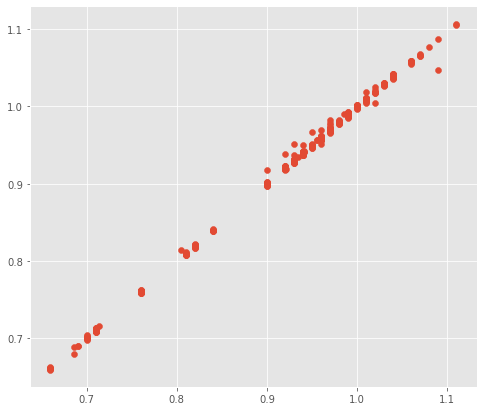

In [65]:
linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)
#storing the prediction in a variable

mse_linreg = mean_squared_error(y_pred_linreg, y_test)
rmse_linreg = mse_linreg **1/2
print(rmse_linreg)

plt.scatter(x = y_test, y = y_pred_linreg)

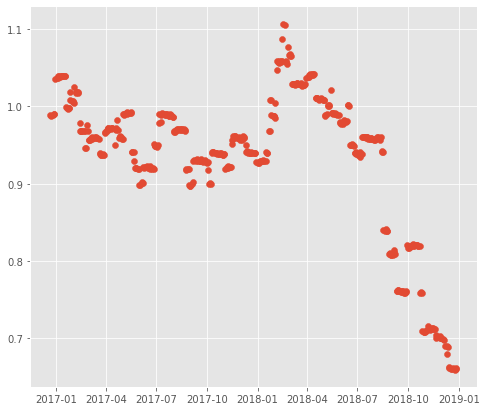

In [56]:
plt.scatter(x = y_test.index, y = y_pred_linreg)

In [57]:
pred_vs_actual_linreg = pd.DataFrame(linreg.predict(independent_variable), index = independent_variable.index, columns = ['pred_price'])
pred_vs_actual_linreg['actual_price'] = dependent_variable
pred_vs_actual_linreg

,pred_price,actual_price
2009-01-02,0.522944,0.52
2009-01-05,0.525822,0.52
2009-01-06,0.526814,0.52
2009-01-07,0.526169,0.52
2009-01-08,0.531774,0.53
...,...,...
2018-12-20,0.660031,0.66
2018-12-21,0.662045,0.66
2018-12-24,0.659654,0.66
2018-12-26,0.661287,0.66


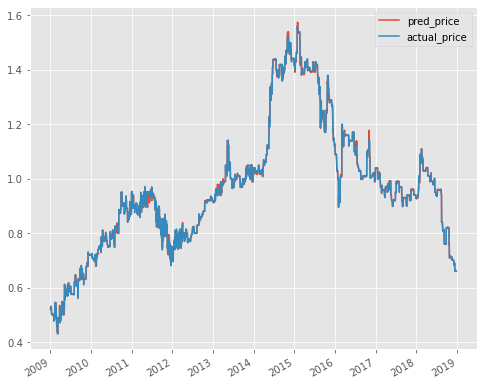

In [58]:
pred_vs_actual_linreg.plot()

4.464492031872497e-05


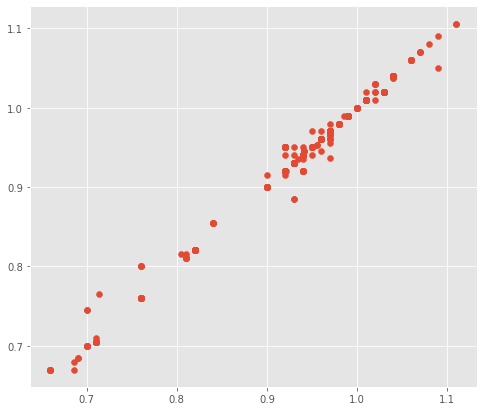

In [59]:
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

mse_tree = mean_squared_error(y_pred_tree, y_test)
rmse_tree = mse_tree **1/2
print(rmse_tree)

plt.scatter(x = y_test, y = y_pred_tree)

In [60]:
pred_vs_actual_tree = pd.DataFrame(tree.predict(independent_variable), columns = ['pred_price'], index = independent_variable.index)
pred_vs_actual_tree['actual_price'] = dependent_variable
pred_vs_actual_tree

,pred_price,actual_price
2009-01-02,0.52,0.52
2009-01-05,0.52,0.52
2009-01-06,0.52,0.52
2009-01-07,0.52,0.52
2009-01-08,0.53,0.53
...,...,...
2018-12-20,0.67,0.66
2018-12-21,0.67,0.66
2018-12-24,0.67,0.66
2018-12-26,0.67,0.66


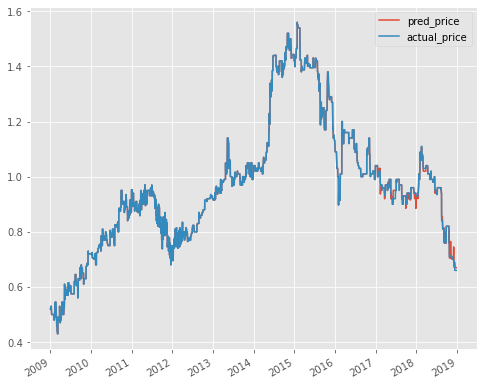

In [61]:
pred_vs_actual_tree.plot()